<a href="https://colab.research.google.com/github/sarabk91/Module5/blob/main/pandas_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [66]:
# Import mouse_Metadata and Study_results DataFrames
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

In [67]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [68]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [69]:
# Merge mouse_metadata and study_results into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Combine the data into a single DataFrame
unique_mice = merged_data["Mouse ID"].nunique()
print("Number of unique mice IDs:", unique_mice)

Number of unique mice IDs: 249


In [71]:
# Display the data table for preview
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
print("Mouse ID with duplicate time points:")
duplicate_mice['Mouse ID']

Mouse ID with duplicate time points:


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [72]:
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
updated_unique_mice = cleaned_data["Mouse ID"].nunique()
print("Updated number of unique mice IDs:", updated_unique_mice)

Updated number of unique mice IDs: 249


In [74]:
# Group the data by drug regimen
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate the required statistics for tumor volume
summary_statistics = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns
summary_statistics = summary_statistics.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
})

# Display the summary statistics
print("Summary Statistics:")
print("----------------------------------------------------------------------------------")
print(summary_statistics)

Summary Statistics:
----------------------------------------------------------------------------------
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.96

In [75]:
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# **Bar and Pie Charts**

***********************************************************************************************


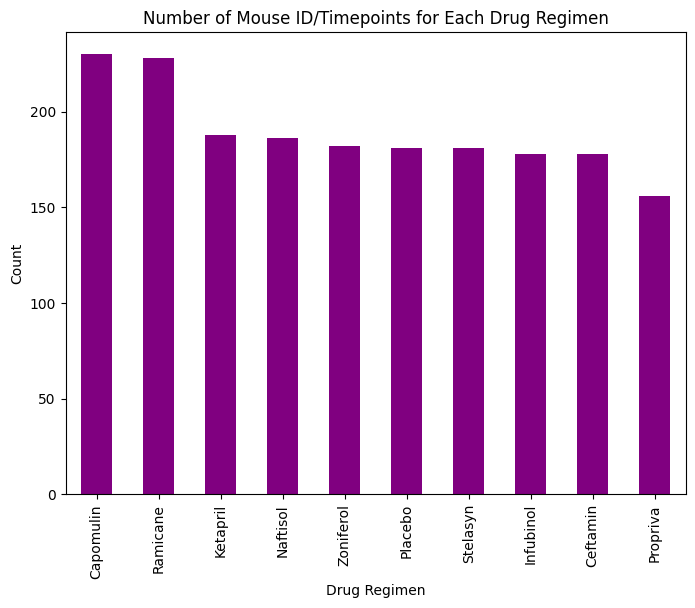

In [147]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
print("***********************************************************************************************")
# Count the number of rows for each drug regimen
bar_data = cleaned_data["Drug Regimen"].value_counts()

# Create the bar chart using DataFrame.plot()
bar_data.plot(kind="bar", figsize=(8, 6), color="purple")

# Set the chart title and axis labels
plt.title("Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Show the bar chart
plt.show()

***********************************************************************************************


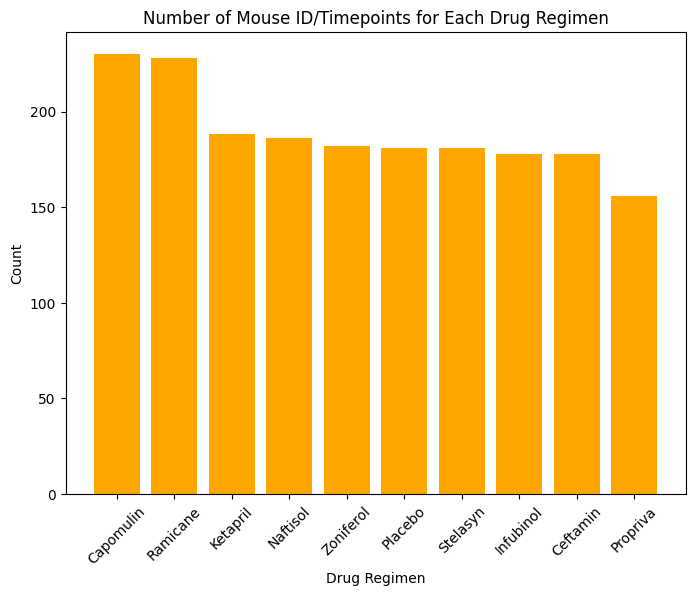

In [146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
print("***********************************************************************************************")
# Count the number of rows for each drug regimen
bar_data = cleaned_data["Drug Regimen"].value_counts()

# Create the bar chart using Matplotlib's pyplot
plt.figure(figsize=(8, 6))
plt.bar(bar_data.index, bar_data.values, color="orange")

# Set the chart title and axis labels
plt.title("Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
print("***********************************************************************************************")
# Count the number of female and male mice
pie_data = cleaned_data["Sex"].value_counts()

# Create the pie chart using DataFrame.plot()
pie_data.plot(kind="pie", figsize=(8, 6), autopct="%1.1f%%", colors=["red", "yellow"])

# Set the chart title
plt.title("Distribution of Female vs. Male Mice")

# Show the pie chart
plt.show()

***********************************************************************************************


************************************************************


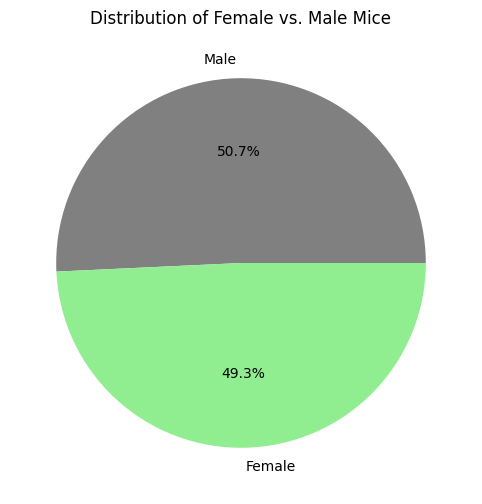

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
print("************************************************************")
# Count the number of female and male mice
pie_data = cleaned_data["Sex"].value_counts()

# Create the pie chart using Matplotlib's pyplot
plt.figure(figsize=(8, 6))
plt.pie(pie_data.values, labels=pie_data.index, autopct="%1.1f%%", colors=["gray", "lightgreen"])

# Set the chart title
plt.title("Distribution of Female vs. Male Mice")

# Show the pie chart
plt.show()

#**Quartiles, Outliers and Boxplots**

In [80]:
# Group the data by Mouse ID and find the maximum time point
grouped_last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge the grouped DataFrame with the original cleaned DataFrame
merged_last_timepoint = pd.merge(grouped_last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

In [81]:
# List of treatment names
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to hold tumor volume data
tumor_volume_data = []

In [82]:
for treatment in treatment_list:
    # Locate the rows corresponding to the current treatment
    treatment_rows = merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == treatment]

    # Append the tumor volumes to the list
    tumor_volume_data.append(treatment_rows["Tumor Volume (mm3)"])

In [83]:
# Calculate the quartiles and IQR for each treatment
for i in range(len(treatment_list)):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]

    print(f"Potential outliers for {treatment_list[i]}: {outliers.tolist()}")

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


***********************************************************************************************


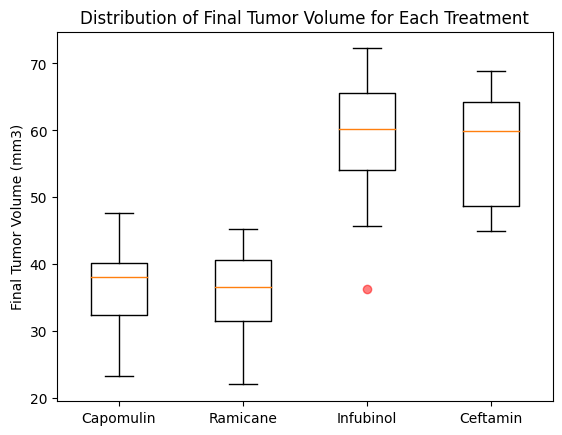

In [141]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
print("***********************************************************************************************")
# Create a figure and axis
fig, ax = plt.subplots()

# Generate the box plot
box_plot = ax.boxplot(tumor_volume_data, sym="ro")

# Customize the box plot
ax.set_xticklabels(treatment_list)
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Distribution of Final Tumor Volume for Each Treatment")

# Highlight potential outliers
for i in range(len(treatment_list)):
    outliers = box_plot["fliers"][i]
    outliers.set(marker="o", color="purple", alpha=0.5)

# Show the box plot
plt.show()

#**Line and Scatter Plots**

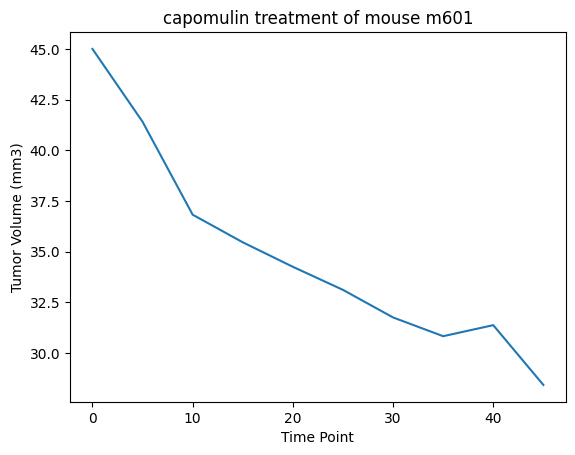

In [132]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
from matplotlib import markers
# Select a single mouse treated with Capomulin
selected_mouse = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].sample(1).values[0]

# Filter the data for the selected mouse
selected_mouse_data = cleaned_data[cleaned_data["Mouse ID"] == selected_mouse]

# Create the line plot
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"])

# Set the chart title and axis labels
plt.title(f"capomulin treatment of mouse {selected_mouse}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Show the line plot
plt.show()


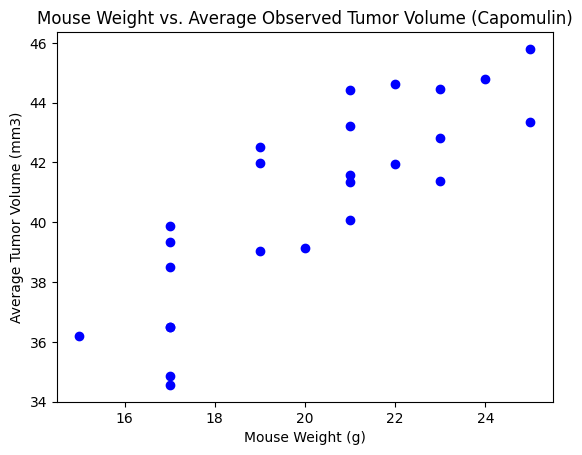

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue")

# Set the chart title and axis labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the scatter plot
plt.show()


#**Correlation and Regression**

************************************************************************************
Correlation Coefficient: 0.841936342469472


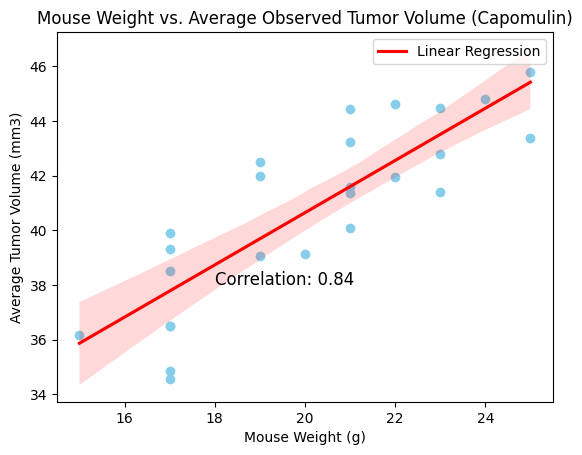

In [139]:
import scipy.stats as stats
import seaborn as sns

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regime
print("************************************************************************************")
# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Calculate the correlation coefficient
correlation = stats.pearsonr(mouse_weight, average_tumor_volume)
print("Correlation Coefficient:", correlation[0])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="skyblue")

# Plot the linear regression line
sns.regplot(x=mouse_weight, y=average_tumor_volume, scatter=False, color="red", label="Linear Regression")

# Set the chart title and axis labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add the correlation coefficient to the plot
plt.text(18, 38, f"Correlation: {correlation[0]:.2f}", fontsize=12)

# Show the scatter plot with linear regression
plt.legend()
plt.show()
